In [ ]:
import os
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definir la ruta donde están guardados los modelos
model_path = "/Users/chants/Desktop/Pset2_cucalon/models/"

# Cargar los modelos entrenados desde el path definido
lin_reg = joblib.load(os.path.join(model_path, "lin_reg.pkl"))
poly_reg = joblib.load(os.path.join(model_path, "poly_reg.pkl"))
sgd_reg = joblib.load(os.path.join(model_path, "sgd_reg.pkl"))
lasso_reg = joblib.load(os.path.join(model_path, "lasso_reg.pkl"))
ridge_reg = joblib.load(os.path.join(model_path, "ridge_reg.pkl"))
poly = joblib.load(os.path.join(model_path, "poly_features.pkl"))

# Cargar el dataset para evaluación
file_path = "/Users/chants/Desktop/Pset2_cucalon/data/processed/Airbnb_Featured_Scaled.csv"
df = pd.read_csv(file_path)
X = df.drop(columns=["log_price"])
y = df["log_price"]

# División en conjunto de prueba (para evaluar los modelos)
_, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transformar X_test para la regresión polinomial
X_test_poly = poly.transform(X_test)

# Función para evaluar modelos
def evaluar_modelo(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return [rmse, mae, r2]

# Evaluar múltiples modelos automáticamente
modelos = {
    "Regresión Lineal": lin_reg,
    "Regresión Polinomial": poly_reg,
    "SGDRegressor": sgd_reg,
    "Lasso": lasso_reg,
    "Ridge": ridge_reg
}

# Crear lista para almacenar resultados
resultados = []

# Evaluar cada modelo y almacenar los resultados
for nombre, modelo in modelos.items():
    if nombre == "Regresión Polinomial":
        rmse, mae, r2 = evaluar_modelo(modelo, X_test_poly, y_test)
    else:
        rmse, mae, r2 = evaluar_modelo(modelo, X_test, y_test)
    resultados.append([nombre, rmse, mae, r2])

# Convertir lista de resultados en DataFrame
df_resultados = pd.DataFrame(resultados, columns=["Modelo", "RMSE", "MAE", "R2"])

# Mostrar la tabla comparativa de resultados
print(df_resultados)

# Guardar resultados en un archivo CSV en la misma carpeta de modelos
df_resultados.to_csv(os.path.join(model_path, "model_evaluation_results.csv"), index=False)

print(f"✅ Evaluación completada y guardada")


                 Modelo      RMSE       MAE        R2
0      Regresión Lineal  0.476722  0.355525  0.557616
1  Regresión Polinomial  0.457372  0.340455  0.592800
2          SGDRegressor  0.477639  0.357857  0.555913
3                 Lasso  0.476732  0.355571  0.557598
4                 Ridge  0.476722  0.355525  0.557616
✅ Evaluación completada y guardada


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

In [ ]:
import os
import pandas as pd
import joblib
import numpy as np

# Definir la ruta donde están guardados los modelos
model_path = "/Users/chants/Desktop/Pset2_cucalon/models/"

# Cargar los modelos entrenados desde el path definido
lin_reg = joblib.load(os.path.join(model_path, "lin_reg.pkl"))
poly_reg = joblib.load(os.path.join(model_path, "poly_reg.pkl"))
sgd_reg = joblib.load(os.path.join(model_path, "sgd_reg.pkl"))
lasso_reg = joblib.load(os.path.join(model_path, "lasso_reg.pkl"))
ridge_reg = joblib.load(os.path.join(model_path, "ridge_reg.pkl"))
poly = joblib.load(os.path.join(model_path, "poly_features.pkl"))

# Cargar el dataset para predicción (usaremos X_test como ejemplo)
file_path = "/Users/chants/Desktop/Pset2_cucalon/data/processed/Airbnb_Featured_Scaled.csv"
df = pd.read_csv(file_path)
X = df.drop(columns=["log_price"])  # Quitamos la variable objetivo

# Tomar solo algunas muestras para predicción
X_sample = X.sample(5, random_state=42)  # Tomamos 5 ejemplos aleatorios

# Transformar X para la regresión polinomial
X_sample_poly = poly.transform(X_sample)

# Hacer predicciones con cada modelo
predicciones = {
    "Regresión Lineal": lin_reg.predict(X_sample),
    "Regresión Polinomial": poly_reg.predict(X_sample_poly),
    "SGDRegressor": sgd_reg.predict(X_sample),
    "Lasso": lasso_reg.predict(X_sample),
    "Ridge": ridge_reg.predict(X_sample)
}

# Convertir log_price a precio real
df_predicciones = pd.DataFrame(predicciones)
df_predicciones = np.exp(df_predicciones)  # Deshacemos logaritmo

# Agregar identificador de muestra
df_predicciones.insert(0, "Muestra", X_sample.index)

# Mostrar resultados en consola
print(df_predicciones)

# Guardar resultados en un CSV en la misma carpeta de modelos
predicciones_path = os.path.join(model_path, "predicciones_modelos.csv")
df_predicciones.to_csv(predicciones_path, index=False)

print(f"✅ Predicciones guardadas")


   Muestra  Regresión Lineal  Regresión Polinomial  SGDRegressor       Lasso  \
0     4079         50.462139             50.733774     52.149653   50.655585   
1    33735         89.136817             89.524579     92.490017   89.547053   
2    69475        102.941043            116.481274     99.269247  103.245393   
3      454        233.370767            241.398441    232.667523  234.534035   
4    25153         25.335461             30.970709     26.367490   25.434731   

        Ridge  
0   50.462140  
1   89.136817  
2  102.941045  
3  233.370765  
4   25.335462  
✅ Predicciones guardadas


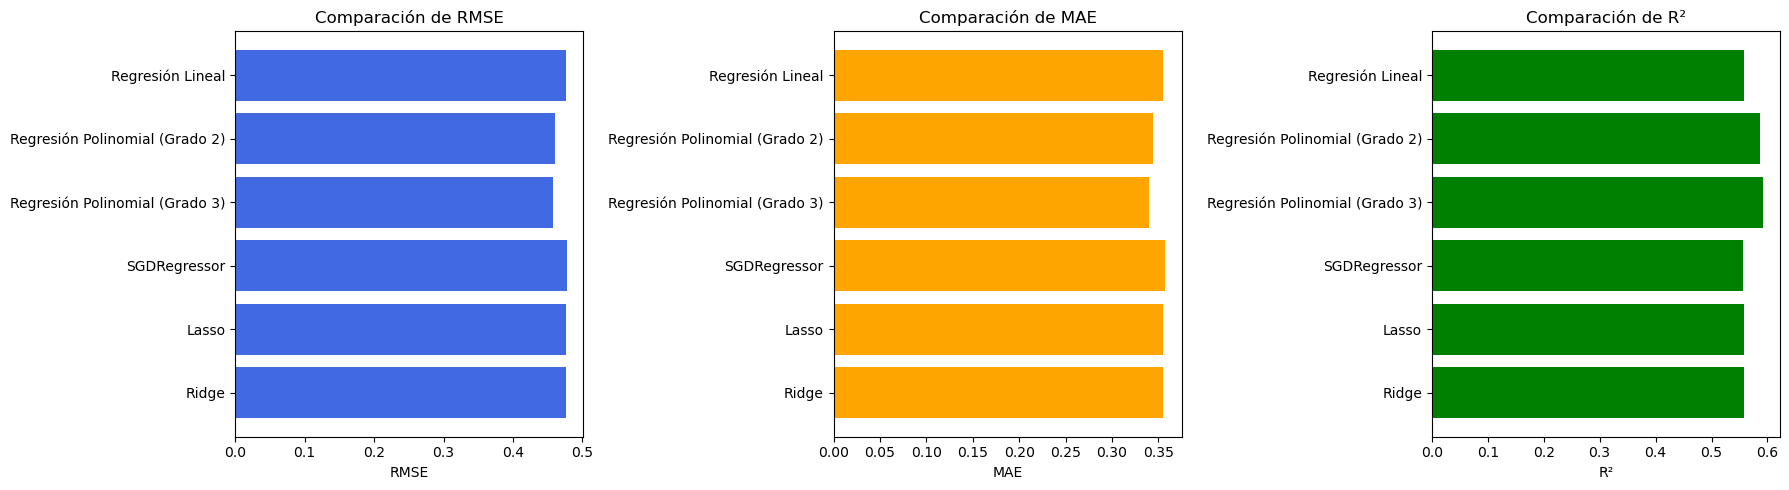

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Datos de los modelos evaluados
modelos = ["Regresión Lineal", "Regresión Polinomial (Grado 2)", "Regresión Polinomial (Grado 3)", 
           "SGDRegressor", "Lasso", "Ridge"]
rmse = [0.4767, 0.4607, 0.4574, 0.4775, 0.4767, 0.4767]
mae = [0.3555, 0.3440, 0.3404, 0.3573, 0.3555, 0.3555]
r2 = [0.5576, 0.5867, 0.5928, 0.5562, 0.5576, 0.5576]

# Crear DataFrame para análisis
df_metricas = pd.DataFrame({"Modelo": modelos, "RMSE": rmse, "MAE": mae, "R²": r2})

# Gráficos comparativos
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# RMSE
ax[0].barh(df_metricas["Modelo"], df_metricas["RMSE"], color="royalblue")
ax[0].set_xlabel("RMSE")
ax[0].set_title("Comparación de RMSE")
ax[0].invert_yaxis()

# MAE
ax[1].barh(df_metricas["Modelo"], df_metricas["MAE"], color="orange")
ax[1].set_xlabel("MAE")
ax[1].set_title("Comparación de MAE")
ax[1].invert_yaxis()

# R²
ax[2].barh(df_metricas["Modelo"], df_metricas["R²"], color="green")
ax[2].set_xlabel("R²")
ax[2].set_title("Comparación de R²")
ax[2].invert_yaxis()

# Mostrar gráficos
plt.tight_layout()
plt.show()


RMSE 
Este indica que tan lejos se encuentran las prediccionde del modelo en promedio. El modelo que obtuvo el menor valor RMSE es regresión polinomial de grado 3. Indica que es el que mejor predice el precio de la propiedad. 
MAE
El valor con menor error (MAE) significa que tiene un mejor ajuste del modelo. En este caso tambien es la regresión polinomial, confirmando que predice con menor error en comparacion con los otros modelos. 
R² 
En este caso el modelo con nayor R² es regresión polinomial. Indica que este modelo es el que mejor explica la variabilidad del precio. 

Tambien si nos basamos en: 
RMSE en entrenamiento: 0.4502
RMSE en prueba: 0.4574
La regresión polinomial tiene el mejor desempeño de error ya que se obtiene el RMSE en el conjunto de prueba. Igual la diferencia entre RMSE de entrenamiento y prueba es pequeña por lo que no se ve un sobreajuste. 

Modelos como SGDRegressor no funcionan bien en este caso porque tienen mayor error y menor R².
Para cumplir con el objetivo de predecir el precio de la propiedad, la Regresión Polinomial de Grado 3 se presenta como la mejor opción. 

El problema principal es la predicción del precio de las propiedades en Airbnb con base en características específicas de cada anuncio. Para abordar esto, se probaron distintos modelos de regresión, evaluando cuál ofrece la mejor solución en términos de precisión y generalización.

El modelo seleccionado (Regresión Polinomial de Grado 3) aprende la relación entre las características de las propiedades y su precio, permitiendo realizar predicciones precisas para nuevas propiedades.
Esto tiene beneficios clave:
- Los propietarios pueden obtener una estimacion realista del valor de su propiedad antes de publicarla en Airbnb. 
- Pueden ajustar los precios segun las caracteristicas del mercado (demandaco o mpetencia).   
- Airbnb puede mejorar su sistema de recomendaciones de precios para equilibrar oferta y demanda.
- El análisis de pesos en los modelos permite entender qué factores afectan más el precio (ubicación, número de habitaciones, calificación, etc.).

Se identificaron características clave que pueden ayudar al negocio a comprender cómo optimizar sus precios en función de los servicios y capacidades que ofrece cada propiedad, como la cantidad de personas que puede alojar. Además, se analizó la competencia en el radio de ubicación para evaluar su impacto en los precios. También se determinaron los factores que influyen significativamente en el precio y aquellos que tienen un impacto menor, lo que permite una mejor estrategia de fijación de precios.

También podemos tener otras aplicaciones del modelo.
- Podría dar recomendaciones de precios óptimos a los anfitriones.
- También podría dar estrategias de precios dinámicos, por ejemplo, con eventos o fechas importantes o en demanda.
- Determinar áreas o características que son rentables para invertir.